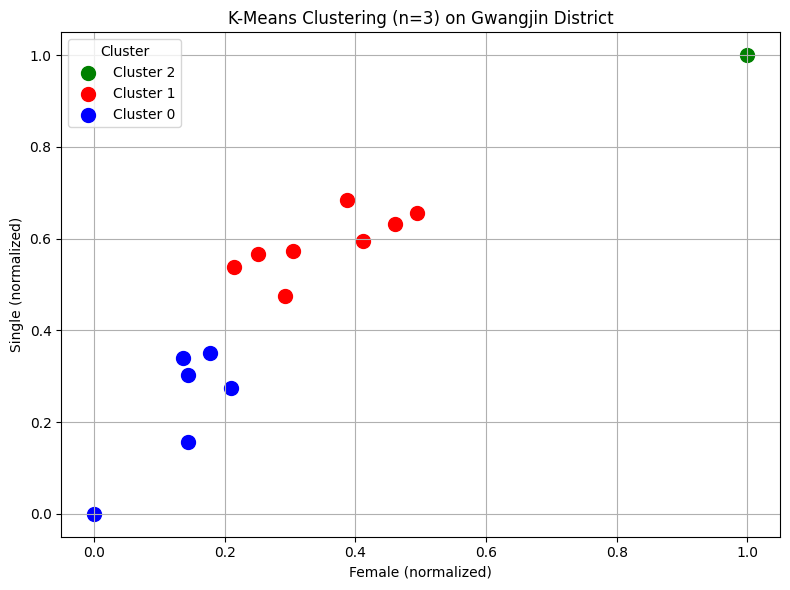

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 데이터 입력
data = {
    "행정동": [
        "화양동", "군자동", "중곡제1동", "중곡제2동", "중곡제3동", "중곡제4동", "능동", "광장동",
        "자양제1동", "자양제2동", "자양제3동", "자양제4동", "구의제1동", "구의제2동", "구의제3동"
    ],
    "여성비율": [0.352, 0.203, 0.209, 0.180, 0.161, 0.142, 0.229, 0.109, 0.183, 0.152, 0.144, 0.170, 0.221, 0.144, 0.160],
    "1인가구비율": [0.831, 0.633, 0.576, 0.501, 0.541, 0.416, 0.614, 0.202, 0.563, 0.423, 0.300, 0.558, 0.600, 0.393, 0.374],
    "노인비율": [0.107, 0.186, 0.192, 0.193, 0.219, 0.232, 0.168, 0.127, 0.189, 0.200, 0.188, 0.220, 0.155, 0.202, 0.183]
}

df = pd.DataFrame(data)

# 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[["여성비율", "1인가구비율", "노인비율"]])
df[["여성비율(norm)", "1인가구비율(norm)", "노인비율(norm)"]] = X_scaled

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df["클러스터"] = kmeans.fit_predict(X_scaled)

# 시각화
plt.figure(figsize=(8, 6))
colors = {0: 'blue', 1: 'red', 2: 'green'}
for cluster in df["클러스터"].unique():
    cluster_data = df[df["클러스터"] == cluster]
    plt.scatter(
        cluster_data["여성비율(norm)"],
        cluster_data["1인가구비율(norm)"],
        label=f"Cluster {cluster}",
        color=colors[cluster],
        s=100
    )

plt.xlabel("Female (normalized)")
plt.ylabel("Single (normalized)")
plt.title("K-Means Clustering (n=3) on Gwangjin District")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()